In [6]:
import numpy as numpy
import matplotlib.pyplot as pyplot
import matplotlib.mlab as mlab
from matplotlib.pyplot import yticks
import networkx as netx
from networkx import all_pairs_shortest_path_length
from collections import defaultdict

In [47]:
#2.1. Вычислить функцию

w=[10,20,30]
x=[11,22,33]
b=10
numpy.dot(w,x)+b

1550

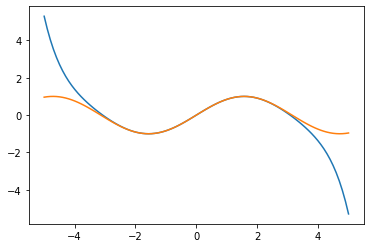

In [48]:
#2.2. На отрезке [-5;5] построить графики функций

figure,graph=pyplot.subplots()
x=numpy.linspace(-5,5,100)
y1=lambda x: x-(x**3)/6+(x**5)/120-(x**7)/5040
y2=lambda x: numpy.sin(x)
graph.plot(x,y1(x))
graph.plot(x,y2(x))

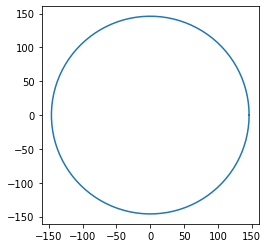

In [82]:
#2.3 Нарисовать в matplotlib окружность заданного радиуса r. 

func=numpy.linspace(0,2*numpy.pi,100) 
figure,graph=pyplot.subplots()
r=146
x=r*numpy.cos(func) 
y=r*numpy.sin(func)
graph.set_aspect(1)
graph.plot(x,y)

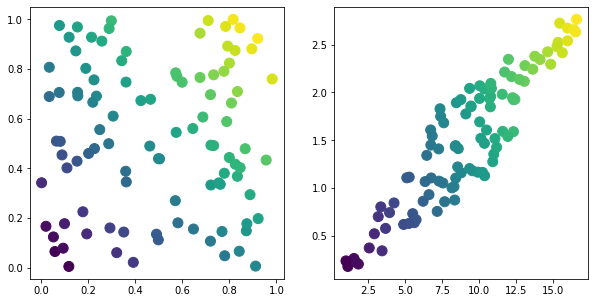

In [67]:
#2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2. 
 #Отрисуйте на одном графике оригинальные точки, на втором - точки после преобразования при помощи матрицы. 
 #Отобразите точки таким образом, чтобы было понятно, какая из точек на первом графике соответствует какой точке на втором. 

def transformation_plot(pts,matrix):
    figure,graph=pyplot.subplots(1,2,figsize=(10,5))
    x=pts[:,0]
    y=pts[:,1]
    summ=x+y
    graph[0].scatter(x,y,100,summ)
    d=numpy.dot(pts,matrix)
    x=d[:,0]
    y=d[:,1]
    graph[1].scatter(x,y,100,summ)
transformation_plot(numpy.random.random(size=(100,2)),numpy.array([[8,2],[10,1]]))

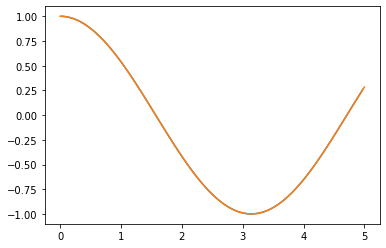

In [71]:
#2.5 Задайте некоторую функцию одной переменной f(x) (пример: sin(x), ln(x), x**2 + 2x + 1, …): 
 #Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение. Сравните для проверки с аналитическим выражением производной. 

figure,graph=pyplot.subplots()
x=numpy.linspace(0,5,100)
y=[numpy.sin(i) for i in x]
x1=x[0:-1]-x[1:]
y1=numpy.array(y[0:-1])-numpy.array(y[1:])
x11=(x[0:-1]+x[1:])/2
y11=numpy.divide(y1,x1)
graph.plot(x11,y11)
graph.plot(x,numpy.cos(x))

In [81]:
#2.6 Дано множество векторов V размерности d. Дан вектор q такой же размерности. Определить: 
 #а) Пропорцию векторов v в V, для которых угол(v,q) < 90 градусов, 
 #б) Пропорцию векторов v в V, для которых угол(v,q) < 30 градусов 

v=numpy.random.random(size=(100,2))-0.5
q=numpy.array([4,1])
k1=0
k2=0
for i in v:
    cos=i.dot(q)/(numpy.linalg.norm(q)*numpy.linalg.norm(i))
    if numpy.arccos(cos)*180/numpy.pi<90:
        k1=k1+1
    if numpy.arccos(cos)*180/numpy.pi<30:
        k2=k2+1
k1=k1/100
k2=k2/100
print('Пропорция векторов, для которых угол(v,q) < 90 градусов:',k1)
print('Пропорция векторов, для которых угол(v,q) < 30 градусов:',k2)

Пропорция векторов, для которых угол(v,q) < 90 градусов: 0.52
Пропорция векторов, для которых угол(v,q) < 30 градусов: 0.19


In [10]:
#3.2 Дан граф друзей из соцсети VK (vk.gml): Необходимо: 
 #1) Определить число уникальных пользователей, 
 #2) Для каждого id пользователя определить число его друзей из данного графа. Вывести топ 15. Учитывать неориентированность графа. Посчитать среднее и медианное число друзей. 
 #3) Для всех возможных пар пользователей (декартова произведения): 
 #Для длин L 1..6 определить пропорцию пар пользователей, для которой кратчайший путь между пользователями в паре составляет L. 
 #Определить пропорцию, для которой этот путь больше 6 (или не существует). Убедиться, что полученные пропорции суммируются в 1. 

nodes=defaultdict(int)
graph=netx.read_gml("VK.gml")
edges=list(graph.edges)
for i in (edges):
    nodes[i[0]]+=1
    nodes[i[1]]+=1
k=[0]*7
pairs=list(all_pairs_shortest_path_length(graph))
for i in pairs:
    for j in i[1].values():
        if j>0 and j<7:
            k[j-1]+=1
        else: 
            k[-1]+=1
a=sum(counts)
nodes1=sorted(nodes.values(), reverse=True)
print('уникальных пользователей:',len(nodes))
print('топ-15 пользователей по количеству друзей:')
[print(node[0],': ',node[1],sep='') for node in sorted(nodes.items(),key=lambda node: node[1],reverse=True)[:15]]
print('среднее кол-во друзей:',round(graph.size()*2/len(nodes),1))
print('медианное кол-во друзей:',nodes1[len(nodes1)//2]/2 if len(nodes1)%2==1 else \
      (nodes1[len(nodes1)//2]+nodes1[len(nodes1)//2-1])/2)
print('пропорции для L1..6:')
print('L=1:',round(k[0]/a,2))
print('L=2:',round(k[1]/a,2))
print('L=3:',round(k[2]/a,2))
print('L=4:',round(k[3]/a,2))
print('L=5:',round(k[4]/a,2))
print('L=6:',round(k[5]/a,2))
print('L>6 или отсутствует:',round(counts[6]/a, 3))

уникальных пользователей: 3766
топ-15 пользователей по количеству друзей:
154572605: 351
136435809: 211
34847138: 210
1997236: 178
472893795: 178
270418723: 167
246825563: 155
120109289: 148
83372852: 146
94780691: 140
63962118: 136
94509311: 135
150491520: 135
122784747: 132
41459412: 130
среднее кол-во друзей: 22.0
медианное кол-во друзей: 15.0
пропорции для L1..6:
L=1: 0.01
L=2: 0.1
L=3: 0.45
L=4: 0.34
L=5: 0.08
L=6: 0.01
L>6 или отсутствует: 0.004
